# **Question**:
The dataset comprising of dogs and cats images is uploaded to google drive.  You will have to write a code that can use **KNNClassifier, SVC, and logistic regression** for classification. You can train the data using the train.zip folder and report the confusion matrix on test1.zip folder.

In [1]:
'''
Importing liberies
'''
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

'''
unziping the datasets in the directory
'''
# !unzip '/content/drive/MyDrive/Colab Notebooks/Assin2/train.zip' -d '/content/drive/MyDrive/Colab Notebooks/Assin2/'
# !unzip '/content/drive/MyDrive/Colab Notebooks/Assin2/test1 (1).zip' -d '/content/drive/MyDrive/Colab Notebooks/Assin2/'

Mounted at /content/drive


'\nunziping the datasets in the directory\n'

In [3]:
'''
function: pre-processing the images into np arrays
'''
def img(data_folder, dim):
    im_data = []
    # Load in the images
    for filepath in os.listdir(data_folder):
        # print(filepath)
        label=None
        x = cv.imread(data_folder+'{0}'.format(filepath),cv.IMREAD_GRAYSCALE)
        features = np.array(cv.resize(x, dim)).flatten()
        
        # labelling the images 
        if (filepath[0:3]=="cat")==True:    # cat label=0
            label = 0
        elif (filepath[0:3]=="dog")==True: 
            label = 1                        # dog label=1 
        else :
            label = None
          
        im_data.append(np.hstack(np.array([features, label],dtype=object)))
        # break
    data = np.vstack(im_data)
    return data


In [6]:
'''
Create the n-dimentional array having feature =(60*60) and label of the train data
'''
dim = (50,50) #reshape the images
data = img('/content/drive/MyDrive/Colab Notebooks/Assin2/Assignment2/train/',dim) #train dataset
X,y = data[:,:-1],data[:,-1]

# get shape of feature matrix
print('Feature matrix shape is: ', X.shape)

# define standard scaler
ss = MinMaxScaler()
# run this on our feature matrix
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature matrix shape is:  (25000, 2500)


Cat


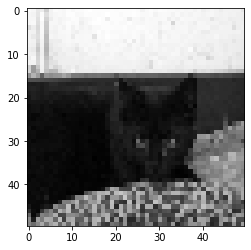

In [7]:
i=np.random.randint(25000)
plt.imshow(data[i][0:-1].reshape(dim), cmap='gray')
if data[i][-1]==1:
    print('Dog')
elif data[i][-1]==0:
    print('Cat')

In [8]:
%%time
# define support vector classifier
svm = SVC(gamma='auto')
# fit model
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
display(accuracy_score(y_test, y_pred)*100)
display(confusion_matrix(y_test, y_pred))

61.040000000000006

array([[1851, 1871],
       [1051, 2727]])

CPU times: user 15min 22s, sys: 0 ns, total: 15min 22s
Wall time: 15min 16s


In [9]:
%%time
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_train)
y_pred1 = KNN_clf.predict(X_test)
display(accuracy_score(y_test, y_pred1)*100)
display(confusion_matrix(y_test, y_pred1))

54.946666666666665

array([[2644, 1078],
       [2301, 1477]])

CPU times: user 38.9 s, sys: 13.5 ms, total: 38.9 s
Wall time: 21.2 s


In [10]:
%%time
lr_clf = LogisticRegression(solver='saga', max_iter=1000)
lr_clf.fit(X_train,y_train)
y_pred2 = lr_clf.predict(X_test)
display(accuracy_score(y_test, y_pred2)*100)
display(confusion_matrix(y_test, y_pred2))

52.82666666666667

array([[2045, 1677],
       [1861, 1917]])

CPU times: user 8min 37s, sys: 455 ms, total: 8min 37s
Wall time: 8min 44s


In [11]:
# define support vector classifier
svm = SVC(C = 1, kernel='poly', gamma='auto')
# fit model
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
display(accuracy_score(y_test, y_pred)*100)
display(confusion_matrix(y_test, y_pred))

58.84

array([[2390, 1332],
       [1755, 2023]])

In [12]:
X_test.shape, X_train.shape

((7500, 2500), (17500, 2500))

## Conclusion:
1. Basically, when we use the pixel values as the feature vector.
2. All three machine learning models (svm,knn,lr) failed to perform that well.
3. Out of the all three modles svm does better job and have best accuracy.
4. So we need to use other feature extration techniques.